In [24]:
!pip install opencv-python



Text(2015-01-14 00:00:00, 178.102997, '178.102997')

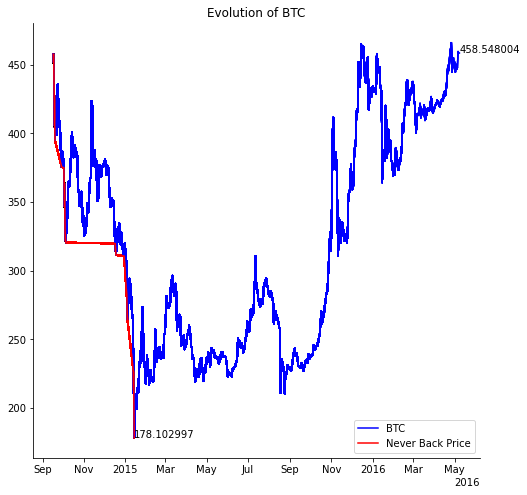

In [13]:
import cv2, os
import pandas as pd
import datetime, time
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from pylab import *
from matplotlib.artist import Artist
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

 


#construire une base de données à partir des fichiers excel
df_btc = pd.read_csv('BTC-USD.csv')#BITCOIN
#supprimer les champs vides
df_btc.dropna(inplace=True)
#conversion date type
df_btc['Date'] = pd.to_datetime(df_btc['Date'],dayfirst=True)
# dataframe BTC 
df_btc = df_btc[['Date','Open','Close']]


# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


# variables declaration
x = df_btc['Date'].tolist()
y = df_btc['Close'].values.tolist()
z,w=[x[0]], [y[0]]
nbp,d=[y[0]],[x[0]]
index,p=0,y[0]
m=y[0]

plt.ion()
figure, ax = plt.subplots(figsize=(8,8))
#add title
plt.title("Evolution of BTC")

#setup axes: automatic graduation of x axis
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


#add text
txt=plt.text(x[0],y[0],str(y[0]))
vid=[]
k=0
for i in range(1,600):
    
    Artist.remove(txt)#remove texte
    z.append((x[i]))#ajouter un élément à la fin de z
    w.append((y[i]))
    
    #ims.append(plt.plot()) #tracer w en foction de z
    
    for j in range(1,i+1):
        if y[j]<m:
            m=y[j]
            index=j
            
   
    nbp.append(m)
    d.append(x[index])
    
    txt=plt.text(x[i],y[i],str(y[i]))#ajouter du texte
    
    im = ax.plot(z,w,'b',d,nbp,'r')
    plt.legend(["BTC","Never Back Price"])
    plt.savefig(os.path.join('./images/', str(i)+'.png'))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
plt.text(x[index],m,str(m))   

        
       

In [14]:
img=[]
for i in range(1,600):
    img.append(cv2.imread('./images/'+str(i)+'.png'))

height,width,layers=img[1].shape

video=cv2.VideoWriter('vid.mp4',-1,10,(width,height))

for j in range(1,len(img)):
    video.write(img[j])

cv2.destroyAllWindows()
video.release()
